In [1]:
import spiceypy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import datetime
from mpl_toolkits.mplot3d import Axes3D
#import plotly.express as px


In [2]:
%matplotlib widget

In [3]:
#load required SPICE kernels
spiceypy.furnsh("../kernels/lsk/naif0012.tls")
spiceypy.furnsh("../kernels/spk/de432s.bsp")

In [4]:
def update_orbit(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    return line

In [5]:
def get_earth_pos(date):
    ET = spiceypy.utc2et(date)
    earth_pos, earth_sun_light_time = spiceypy.spkgeo(targ=399, et=ET, ref= "ECLIPJ2000", obs=10)
    return earth_pos[:3]

In [6]:
base_date = datetime.datetime(2022,1,1)
numdays = 365
date_list = [(base_date+datetime.timedelta(days=x)).strftime("%Y-%m-%dT00:00:00") for x in range(numdays)]
coords = np.array([get_earth_pos(date_list[x]) for x in range(numdays)])
coords = np.transpose(coords)
#print(date_list)
print(coords)


[[-2.61298637e+07 -2.87014567e+07 -3.12641162e+07 ... -1.77105027e+07
  -2.03044966e+07 -2.28919222e+07]
 [ 1.44768666e+08  1.44279350e+08  1.43744850e+08 ...  1.46048671e+08
   1.45705362e+08  1.45316748e+08]
 [-6.81896033e+03 -6.68995422e+03 -6.57136790e+03 ... -7.16920758e+03
  -7.20711915e+03 -7.25550152e+03]]


/tmp/ipykernel_9233/3499909698.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


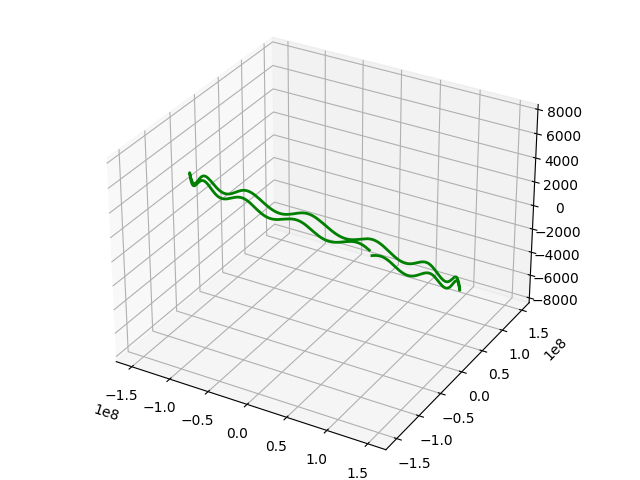

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
 
# NOTE: Can't pass empty arrays into 3d version of plot()
earth_orbit = plt.plot(coords[0], coords[1], coords[2], lw=2, c='g')[0] # For line plot

ani = animation.FuncAnimation(
    fig, func=update_orbit, frames=numdays, fargs=(coords, earth_orbit), blit = False, interval = 50
)

plt.show()